# Statistics
## Measures of Center
This notebook shows how to compute measures of center to compare food consumption in the US and Belgium using pandas and numpy skills. 
#### The Dataset used for this analysis can be found in the repo


In [1]:
import pandas as pd
import numpy as np

#### Importing our data set using the pandas library

In [2]:
food_consumption = pd.read_csv('food_consumption.csv')
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


#### Extracting Belgium data by creating a variable container to hold just values for Belgium in the country column of the dataset 

In [3]:
be_consumption = food_consumption[food_consumption['country'] == 'Belgium']

#### Extracting USA data by creating a variable container to hold just values for USA in the country column of the dataset 

In [4]:
usa_consumption = food_consumption[food_consumption['country'] == 'USA']

#### Calculating the mean and median consumption in Belgium

In [5]:
print(np.mean(be_consumption['consumption']))
print(np.median(be_consumption['consumption']))

42.132727272727266
12.59


#### Calculating the mean and median consumption in USA

In [6]:
print(np.mean(usa_consumption['consumption']))
print(np.median(usa_consumption['consumption']))

44.650000000000006
14.58


#### Creating a subset variable for Belgium and USA only

In [7]:
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == 'USA')]

#### Grouping by country, selecting the consumption column and computing the mean and median

In [8]:
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [9]:
import matplotlib.pyplot as plt

#### Setting a subset variable for food_category to equal rice

In [10]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

#### Histogram plot showing the CO2 emission of rice

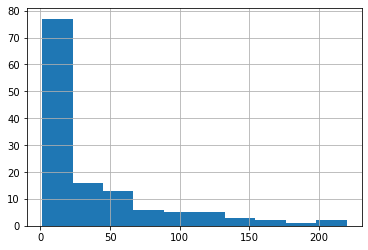

In [11]:
rice_consumption['co2_emission'].hist()
plt.show()

#### Creating a subset variable for just rice in the food_category

In [12]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

#### Calculating the mean and median of CO2 emission using the .agg() argument

In [13]:
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


# Measures of Spread
#### Calculating the quantile of CO2 emission

In [14]:
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


#### Calculating the quintiles of CO2 emission

In [15]:
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


#### Calculating the deciles of CO2 emission

In [16]:
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 10)))

[0.00000000e+00 9.05555556e-01 4.19111111e+00 8.05333333e+00
 1.32000000e+01 2.10944444e+01 3.58666667e+01 7.90622222e+01
 1.86115556e+02 1.71200000e+03]


#### Calculating the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.

In [17]:
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


#### Creating a histogram of co2_emission for the beef food_category

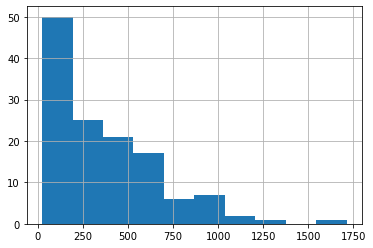

In [18]:
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
plt.show()

#### Creating a histogram of co2_emission for the eggs food_category

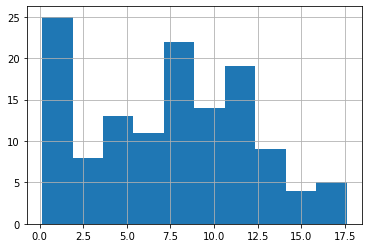

In [19]:
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
plt.show()

#### Calculating the total co2_emission per country by grouping by country and taking the sum of co2_emission and storing the resulting DataFrame as emissions_by_country.

In [20]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

In [21]:
print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


#### Computing the first and third quartiles of emissions_by_country and storing these variables as q1 and q3.

In [22]:
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)

#### Calculating the interquartile range of emissions_by_country and storing it as iqr

In [23]:
iqr = q3 - q1
print(iqr)

664.4925


#### Calculating the lower and upper cutoffs for outliers of emissions_by_country, and storing them as lower and upper.

In [24]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(lower)
print(upper)

-550.07875
2107.8912499999997


#### Subsetting emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.

In [25]:
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
